In [1]:
from fastai.vision.all import *
import pandas as pd
import cam
import util

In [2]:
dls, labels = util.chexpert_data_loader()

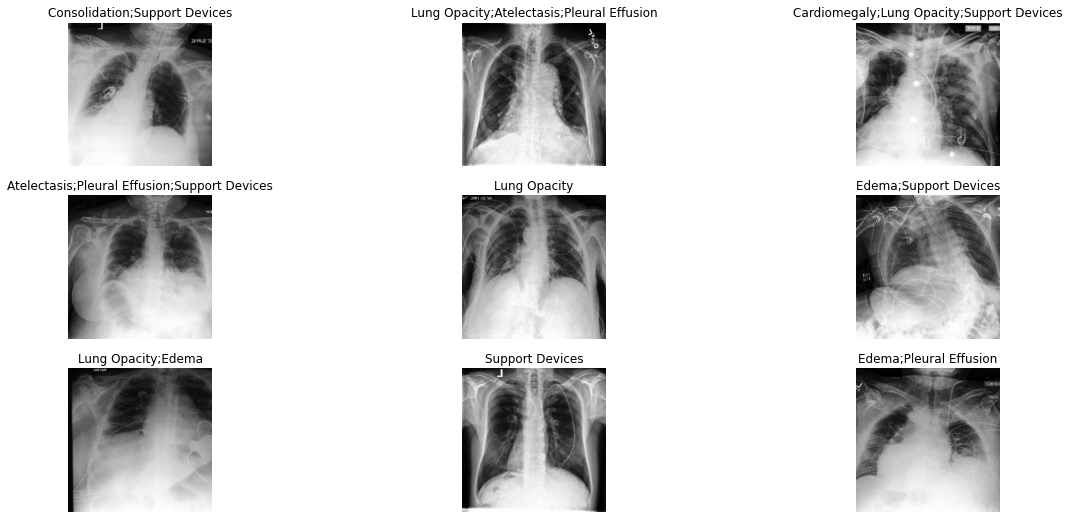

In [3]:
dls.show_batch(max_n=9, figsize=(20,9))

In [4]:
# First train on conditional probabilities
chexpert_learner_conditional = util.ChexpertLearner(dls, densenet121, n_out=len(labels),
                                        loss_func=util.BCEFlatHLCP(hierarchy_map=util.hierarchy_map),
                                        metrics=[accuracy_multi,
                                                 RocAucMulti(average='weighted')])

lr_min/10: 3.981071586167673e-07, lr_steep: 3.311311274956097e-06, base_lr: 3.311311274956097e-06


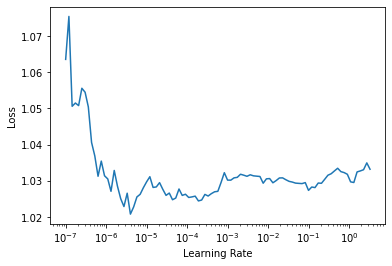

In [5]:
chexpert_learner_conditional.find_lr()

epoch,train_loss,valid_loss,accuracy_multi,roc_auc_score,time
0,1.039922,0.804626,0.521578,0.490778,10:10


Better model found at epoch 0 with accuracy_multi value: 0.5215775370597839.


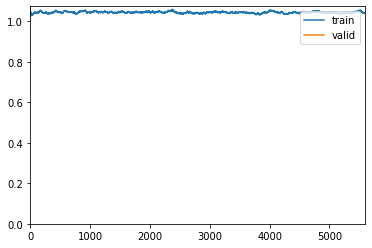

epoch,train_loss,valid_loss,accuracy_multi,roc_auc_score,time
0,1.043923,0.810619,0.518659,0.490510,08:29
1,1.051575,0.811086,0.518406,0.490585,08:35
2,1.043761,0.822034,0.512856,0.491648,08:35
3,1.047343,0.818347,0.514511,0.491829,08:38
4,1.042994,0.818048,0.513770,0.488959,08:37
5,1.042578,0.809364,0.519343,0.491965,08:51
6,1.055222,0.807887,0.520859,0.491330,08:36
7,1.051032,0.819498,0.513228,0.491271,08:36
8,1.051763,0.823936,0.509430,0.489988,08:43
9,1.039806,0.813226,0.518575,0.491573,08:38


Better model found at epoch 0 with accuracy_multi value: 0.5186585187911987.


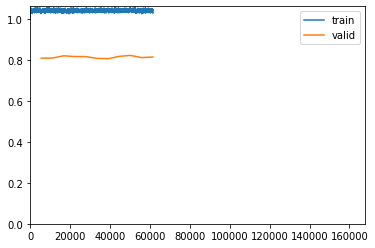

Epoch 1: reducing lr to 4.860444612571719e-08
Epoch 2: reducing lr to 6.622264567630662e-08
Epoch 3: reducing lr to 8.783519653851618e-08
Epoch 4: reducing lr to 1.1083532798634403e-07
Better model found at epoch 5 with accuracy_multi value: 0.5193432569503784.
Better model found at epoch 6 with accuracy_multi value: 0.5208590030670166.
Epoch 7: reducing lr to 1.615702131246597e-07
Epoch 8: reducing lr to 1.6556556361905452e-07
Epoch 9: reducing lr to 1.6464128774318955e-07
Epoch 10: reducing lr to 1.6188844700958633e-07
Epoch 11: reducing lr to 1.573685341525533e-07
No improvement since epoch 6: early stopping


In [6]:
chexpert_learner_conditional.learn_model(use_saved=False, epochs=30)

In [7]:
# Reload the data as it may have been modified for conditional probs
dls, labels = util.chexpert_data_loader()

In [3]:
# Next train unconditionally for only transfer learning
chexpert_learner_unconditional = util.ChexpertLearner(dls, densenet121, n_out=len(labels),
                                        loss_func=BCEWithLogitsLossFlat(),
                                        metrics=[accuracy_multi,
                                                 RocAucMulti(average='weighted')])

lr_min/10: 0.017378008365631102, lr_steep: 0.04786301031708717, base_lr: 0.04786301031708717


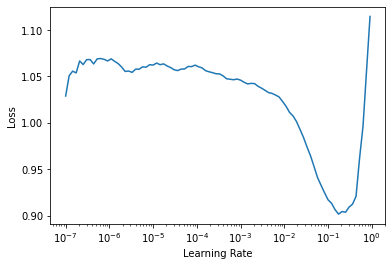

In [9]:
chexpert_learner_unconditional.find_lr()

epoch,train_loss,valid_loss,accuracy_multi,roc_auc_score,time
0,0.368977,0.368657,0.939401,0.705080,21:22
1,0.370279,0.368469,0.939809,0.696572,23:42
2,0.372303,0.367899,0.938277,0.727542,23:38
3,0.374731,0.367806,0.938588,0.730253,23:43
4,0.372629,0.368568,0.936200,0.722048,23:40
5,0.374378,0.369658,0.935952,0.707132,23:45
6,0.373486,0.370679,0.938568,0.714756,23:45


Better model found at epoch 0 with accuracy_multi value: 0.9394014477729797.


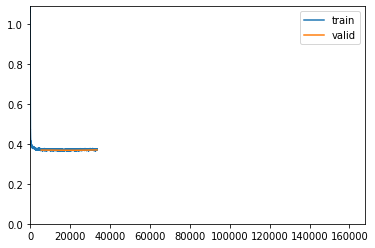

Better model found at epoch 1 with accuracy_multi value: 0.9398086667060852.
Epoch 2: reducing lr to 0.000306146316431956
Epoch 3: reducing lr to 0.00039402946065721317
Epoch 4: reducing lr to 0.0005053298571530724
Epoch 5: reducing lr to 0.0006388031431321105
Epoch 6: reducing lr to 0.0007929574549819001
No improvement since epoch 1: early stopping


epoch,train_loss,valid_loss,accuracy_multi,roc_auc_score,time
0,0.371654,0.369337,0.938442,0.716218,29:39
1,0.371569,0.368593,0.939937,0.720577,29:36
2,0.375182,0.370891,0.939390,0.729304,29:07
3,0.377193,0.384282,0.936244,0.677334,29:01
4,0.376190,0.834802,0.930161,0.692852,28:53
5,0.379033,0.431732,0.936513,0.710035,29:04
6,0.375551,0.421955,0.936591,0.709869,28:48


Better model found at epoch 0 with accuracy_multi value: 0.9384422302246094.


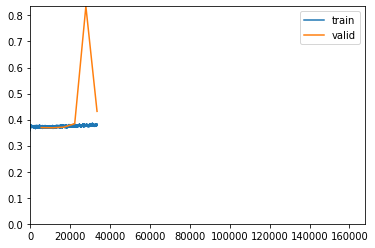

Better model found at epoch 1 with accuracy_multi value: 0.9399369955062866.
Epoch 2: reducing lr to 0.0009572084621588154
Epoch 3: reducing lr to 0.001269604869201588
Epoch 4: reducing lr to 0.0016020579179704148
Epoch 5: reducing lr to 0.0019144686148888416
Epoch 6: reducing lr to 0.0021691557119265224
No improvement since epoch 1: early stopping


In [10]:
chexpert_learner_unconditional.learn_model(use_saved=True, train_saved=True, epochs=30, freeze_epochs=30)

In [ ]:
chexpert_learner = chexpert_learner_unconditional
cam.plot_cam(chexpert_learner.learn)

In [ ]:
interp = Interpretation.from_learner(chexpert_learner.learn)
interp.plot_top_losses(9)